In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
connection = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};"
                            "DATABASE=Lot_Tracing;SERVER=sql2-ao-plt;"
                            "Trusted_Connection=yes")

In [3]:
# connection = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};"
#                             "DATABASE=Lot_Tracing_Archive;SERVER=sql2-ao-plt;"
#                             "Trusted_Connection=yes")

In [48]:
# list tables
pd.set_option('display.max_rows', 999)
pd.read_sql_query("SELECT * FROM INFORMATION_SCHEMA.TABLES", connection)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,Lot_Tracing_Archive,dbo,PICS_AbnormalCode_Master,BASE TABLE
1,Lot_Tracing_Archive,dbo,PICS_TBL_SEND_MAIL,BASE TABLE
2,Lot_Tracing_Archive,dbo,PICS_ECS,BASE TABLE
3,Lot_Tracing_Archive,dbo,PICS_AppSettings,BASE TABLE
4,Lot_Tracing_Archive,dbo,TT_Cos_Laminator_History,BASE TABLE
5,Lot_Tracing_Archive,dbo,PICS_ReSerial_ReSpec,BASE TABLE
6,Lot_Tracing_Archive,dbo,TT_COS_LAMINATOR,BASE TABLE
7,Lot_Tracing_Archive,dbo,TT_Cos_Work,BASE TABLE
8,Lot_Tracing_Archive,dbo,PICS_serial_control_Scrap,BASE TABLE
9,Lot_Tracing_Archive,dbo,TT_cos_history,BASE TABLE


TT_Serial_Control_Extend has each tire and cure timestamps

Join with PICS_Serial_Control to get spec

Join PICS_Spec_Master to get size info, etc.

Mold changes?

Major events (failures, maintenance, etc.)?

In [4]:
pd.set_option('display.max_columns', 999)
sql_query =\
'''
select min(Curing_UpdateTime) as min,
       max(Curing_UpdateTime) as max,
       count(Curing_UpdateTime) as record_count
from TT_Serial_Control_Extend
'''
pd.read_sql_query(sql_query,connection)

,min,max,record_count
0,2014-03-27 11:32:23.190,2019-08-21 14:11:19.073,45231


Data goes back to 2014, is data complete/accurate since then?<br>
AB - Yes, 51 running 2017 forward (not at full production prior)

In [5]:
pd.set_option('display.max_columns', 999)
sql_query =\
'''
select *
from TT_Serial_Control_Extend
where Curing_UpdateTime >= '2019-01-01'
'''
# pd.read_sql_query(sql_query,connection).to_excel('TT_Serial_Control_Extend_Sample.xlsx')
pd.read_sql_query(sql_query,connection).head()

,Serial,Ply_Station,Ply_InTime,Ply_OutTime,Ply_EmpId,Ply_UpdateTime,BJ_Station,BJ_InTime,BJ_OutTime,BJ_EmpId,BJ_UpdateTime,BAND_Station,BAND_InTime,BAND_OutTime,BAND_EmpId,BAND_UpdateTime,FJ_Station,FJ_InTime,FJ_OutTime,FJ_EmpId,FJ_UpdateTime,FirstStage_Station,FirstStage_InTime,FirstStage_OutTime,FirstStage_EmpId,FirstStage_UpdateTime,SJ_Station,SJ_InTime,SJ_OutTime,SJ_EmpId,SJ_UpdateTime,SecondStageBT_Station,SecondStageBT_InTime,SecondStageBT_OutTime,SecondStageBT_EmpID,SecondStageBT_UpdateTime,SecondStageFR_Station,SecondStageFR_InTime,SecondStageFR_OutTime,SecondStageFR_EmpId,SecondStageFR_UpdateTime,Laminator_Station,Laminator_InTime,Laminator_OutTime,Laminator_EmpId,Laminator_UpdateTime,Groover_Station,Groover_InTime,Groover_OutTime,Groover_EmpId,Groover_UpdateTime,Shaper,Shaper_InTime,Shaper_OutTime,Shp_EmpId,Shaper_UpdateTime,Shp_Assy,C_Heater,C_HeaterPsn,Cin_Date,Cout_Date,Cin_EmpId,Curing_UpdateTime,RecipeEnd,DomeOpenTime,DomeLockedTime,Cure_Code,FIUpdateTime,FI_EmpId,FI_Class,HST_EmpId,HST_Station,HSTIn_time,HSTOut_time,HSTUpdateTime,WarehouseTime,WH_EmpId,Update_Id,Update_Time,TrialCode,Manifold,RingVerification,RingsUserId,RingsUpdatetime,ShaperNoVerification,ShaperUpdatetime,ShaperUserId,PanelVerified,PanelUserId,PanelUpdatetime,MoldVerified,MoldUserId,MoldUpdatetime,Laminator_Base_Station,Laminator_Base_InTime,Laminator_Base_OutTime,Laminator_Base_EmpId,Laminator_Base_UpdateTime,Laminator_Cap_Station,Laminator_Cap_InTime,Laminator_Cap_OutTime,Laminator_Cap_EmpId,Laminator_Cap_UpdateTime,Laminator_LotReport_ProcessTime,Laminator_LotReport_LamiWeightMAX,Laminator_LotReport_LamiWeightMIN,Laminator_LotReport_GCWeight,Laminator_LotReport_GTWeight,Laminator_Assy_Station,Laminator_Assy_InTime,Laminator_Assy_OutTime,Laminator_Assy_EmpID,Laminator_Assy_UpdateTime,TireBarcodeVerified,TireBCVerfiedby,TireBCVerifieddate,Bar_in,Bar_Out,Bar_Station,Bar_EmpID,Bar_Updatetime,Avg_GTWeight,GT_Weight_PLC,GT_Weight_Spec,GT_WeightTime,Usc_in,Usc_Out,Usc_Station,Usc_EmpID,Usc_updatetime,Xra_in,Xra_Out,Xra_Station,Xra_EmpID,Xra_updatetime,Cure_Extend_Minutes,Wh_Class,WH_ClassChgDate,Wh_StageTime,Re_Class,Re_Class_Emp,Re_Class_Date,Shipping_Order,Shipping_Date,OtherComments,GtWeight_EmpID,Laminator_DisAssy_Station,Laminator_DisAssy_InTime,Laminator_DisAssy_OutTime,Laminator_DisAssy_EmpID,Laminator_DisAssy_UpdateTime,Doper_Station,Doper_Recipe_Download_Time,Doper_EmpID,Doper_Update,Stop_Before_WH,Stop_Before_WH_Date,Stop_Before_WH_Empid,Stop_Before_WH_Reason,Stop_Before_WH_RelDate,Stop_Before_WH_RelEmpID,Stop_Before_WH_RelReason,Rework_Station,Rework_in,Rework_Out,Rework_EmpID,Rework_Updatetime,INI_EmpID,INI_Station,INI_in,INI_Out,INI_Updatetime
0,A8K000474,None,2018-12-30 20:45:47.260,2018-12-30 20:45:47.260,BFUSA\49TAM1-Band,2018-12-30 20:45:47.260,None,None,2018-12-30 22:46:49.723,PICS_ORR_PREASSEMBLY,2018-12-30 22:46:49.723,176BS4901,2018-12-30 22:53:27.240,2018-12-30 23:23:21.990,10179504,2018-12-30 23:23:21.990,None,None,NaT,None,NaT,176FS4901,2018-12-31 00:46:46.413,2018-12-31 01:25:33.637,10136110,2018-12-31 01:25:33.637,None,None,NaT,None,NaT,176SS4901,2018-12-31 00:39:08.700,2018-12-31 02:31:31.453,10124950,2018-12-31 02:31:33.177,176SS4901,2018-12-31 02:31:33.177,2018-12-31 02:52:12.467,None,2018-12-31 02:52:12.467,176LAM02,2018-12-31 08:54:10.887,2018-12-31 09:20:54.440,WONDERWARE,2018-12-31 09:20:54.440,None,NaT,NaT,None,NaT,166SU01,2018-12-31 13:22:46.013,2018-12-31 13:25:25.230,10109751,2018-12-31 13:25:25.230,RAO49,166PH4B11,1.0,2018-12-31 23:23:29.370,2019-01-01 06:29:17.760,PLC,2019-01-01 06:29:17.760,None,None,None,P-0385-130-0005-01,2019-01-02 03:57:35.460,10174257,3,10109760,133TRIM01,2019-01-02 00:13:24,2019-01-02 00:13:24,2019-01-02 00:13:24,2019-01-03 07:31:42.140,10123904,PICS_ORR_TIREROOM,2018-12-31 12:47:32.920,None,None,None,None,None,Shaper Verified,2018-12-31 13:03:48.427,10109751,None,None,NaT,M0002,10087165,2018-12-31 22:56:40.930,176LAM02,2018-12-31 08:47:36.037,2018-12-31 08:56:58.540,WONDERWARE,2018-1

In [6]:
pd.read_sql_query(sql_query,connection).isnull().sum()

Serial                                  0
Ply_Station                          8306
Ply_InTime                              0
Ply_OutTime                             0
Ply_EmpId                               0
Ply_UpdateTime                          0
BJ_Station                           8377
BJ_InTime                            8377
BJ_OutTime                           8203
BJ_EmpId                             8203
BJ_UpdateTime                        8203
BAND_Station                           13
BAND_InTime                             1
BAND_OutTime                            1
BAND_EmpId                              5
BAND_UpdateTime                         1
FJ_Station                           8377
FJ_InTime                            8377
FJ_OutTime                           7689
FJ_EmpId                             7689
FJ_UpdateTime                        7689
FirstStage_Station                   1877
FirstStage_InTime                      24
FirstStage_OutTime                

Using Serial, Cout_Date

Other important columns from this table?

In [7]:
pd.set_option('display.max_columns', 999)
sql_query =\
'''
select top 1000 *
from PICS_Serial_Control
'''
pd.read_sql_query(sql_query,connection).head()

,Serial,Spec,Type,Gen_Date,Update_ID,Update_Time,B_Dept,B_Tam,B_Date,B_Carcas,B_EmpId,OLTin_EmpID,OLTin_date,Scan_Car_Weight,ByPass_CarWT,ByPass_EmpID_Car,ByPass_Date_Car,Car_Weight,OLT_Station,Scan_Spec_Weight,ByPass_TreadWT,ByPass_EmpID_Trd,ByPass_Date_Trd,Treaded_Weight,Spec_Weight,OLT_Date,OLT_EmpId,Prep_Date,Prep_EmpId,Shaper,Shp_Date,Shp_Assy,Shp_EmpId,C_Heater,C_HeaterPsn,Cin_Date,Cin_EmpId,Cout_Date,Cout_EmpId,RecipeEnd,DomeOpenTime,DomeLockedTime,Cure_Code,FIUpdateTime,FI_EmpId,FI_Class,HST_EmpId,HST_Station,HSTIn_time,HSTOut_time,HSTUpdateTime,WarehouseTime,WH_EmpId,Re_Class,Re_Class_Emp,Re_Class_Date,NSMComments,ScrapComments,OtherComments,OLTComments_Car,OLTComments_Trd,ScrapDept,ScrapWeight,ScrapDate,ScrapID,Shipping_Order,Shipping_Date,COPS_Batch,WH_Class,WH_ClassChgDate,WH_StageTime,Comp_PartID,Comp_MachineID,Comp_Location,Comp_BOSS_Group,Comp_DesinationGroup,Comp_DestinationMachine,Comp_SAPGTC,Comp_Spec,Comp_PlantGreen,Comp_PlantGreenRlse,Comp_SAPWorkCenter,Comp_UOM,Comp_Weight,Comp_DestinationID,Comp_ScheduleDateShift,Comp_ScheduleLotQty,Comp_ScheduleLotID,Comp_ScheduleLotStartDate,Comp_ScheduleLotCompleteDate,Comp_ActualContainerQty,Comp_RemainingQty,Comp_AdjustedQty,Comp_ConsumedDate,Comp_ConsumedAt,Comp_EmployeeID,Comp_BOSSCartNumber,Comp_ScheduleUserSize,Comp_ScheduleStartEndID,Comp_Letoff,Comp_Reprint,Comp_Abnormal_Code,RecUpdateTime,PrintfromPLC,WindupID
0,A4U000142,EL475A-02,TIRE,2014-08-20 09:26:29.333,BFUSA\DandeboinaCh ...,2014-08-27 18:03:14.990,None,None,None,None,None,None,None,None,F,None,None,None,None,None,F,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Operation completed Manually for Band,None,None,None,NaN,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,0.0,None,None,None,None,None,None,None,None,None,2014-08-27 22:02:11.780,None,None
1,A5ALS0087,327972-02,TIRE,2015-05-05 09:44:00.893,PICS_ORR_STOCKCUTTING ...,2015-05-05 09:44:00.000,None,None,None,None,None,None,None,None,F,None,None,None,None,None,F,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Operation completed Manually for First,None,None,None,NaN,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,0.0,None,None,None,None,None,None,None,None,None,2015-05-06 18:12:57.997,None,None
2,A5BLS0051,327727-02,TIRE,2015-10-04 11:15:14.647,BFUSA\KritzasDemit ...,2015-10-04 11:15:14.000,None,None,None,None,None,None,None,None,F,None,None,None,None,None,F,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,0.0,None,None,None,None,None,None,None,None,None,2015-10-04 11:15:14.650,None,None
3,A5Y000012,327739-02,TIRE,2015-04-01 14:57:41.650,PICS_ORR_STOCKCUTTING ...,2015-04-01 14:57:41.000,None,None,None,None,None,None,None,None,F,None,None,None,None,None,F,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Operation completed Manually for Second,None,None,None,NaN,NaT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,0.0,None,None,None,None,None,None,None,None,None,2015-04-03 12:13:32.890,None,None
4,A6ASG0002,330962-01,TIRE,NaT,BFUSA\STAM1-Band ...,2016-05-04 17:32:25.000,None,Non

Use Serial and Spec

In [49]:
pd.set_option('display.max_columns', 999)
sql_query =\
'''
select Gen_Date
from PICS_Serial_Control
'''
df = pd.read_sql_query(sql_query,connection)
df['count'] = 1
df.set_index('Gen_Date').resample('Y').sum()

,count
Gen_Date,
2000-12-31,4
2001-12-31,0
2002-12-31,0
2003-12-31,0
2004-12-31,0
2005-12-31,0
2006-12-31,0
2007-12-31,0
2008-12-31,0


Only serials from 2019 (mostly)?

In [8]:
pd.set_option('display.max_columns', 999)
sql_query =\
'''
select top 1000 *
from PICS_Spec_Master
'''
pd.read_sql_query(sql_query,connection).head(50)

,spec,product_code,spec_desc,weight,ledge,tire_type,cureanf,size,tpfor,drumdia,tread_compound,tread_shape,tread_width,tread_ss,tread_offline,tread_length,serial_code,update_id,update_time,status,bomcure,altcure,cure265,alt265,article,plyrat,article2,CIRC3,DE3,TireGroup,SAPGTC,SAPCTC,BSJCode,Pattern,SpecialSerialCode,Groover,BSJProductcode,Panel1,Panel2,Panel3,Panel4,CancelDate,SAP_WorkCenter,AlternateSpec
0,327718-00,422460US01,VMTPBZ,1357.72,82.0,R,,27.00R49,2*,None,E2A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-08-02,R,P-0408-130-0006-01,,P-0408-130-0006-01,,0422460,1,0422460,,,,EEYA,EEYAA,,VMTPBZ,,NO,OR27R49HRKK1T39BZL,PS010-012,None,None,None,2014-11-07,176SS49,None
1,327718-01,422460US01,VMTPBZ,1358.64,82.0,R,,27.00R49,2*,None,E2A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-11-23,R,P-0408-130-0006-01,,P-0408-130-0006-01,,0422460,1,0422460,,,,EEYA,EEYAA,,VMTPBZ,,NO,OR27R49HRKK1T39BZL,PS010-012,None,None,None,2015-02-28,176SS49,None
2,327718-02,422460US01,VMTPBZ,1356.76,82.0,R,,27.00R49,2*,None,E2A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2019-07-23,R,P-0408-130-0006-01,,P-0408-130-0006-01,,0422460,1,0422460,,,,EEYA,EEYAA,,VMTPBZ,,NO,OR27R49HRKK1T39BZL,PS010-012,None,None,None,2016-10-27,176SS49,None
3,327718-03,422460US01,VMTPBZ,1359.06,82.0,R,,27.00R49,2*,None,E2A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-03-31,C,P-0408-130-0006-01,,P-0408-130-0006-01,,0422460,1,0422460,,,,EEYA,EEYAA,,VMTPBZ,,NO,OR27R49HRKK1T39BZL,PS010-012,None,None,None,2017-03-31,176SS49,
4,327718-04,422460US01,VMTPBZ,1359.20,82.0,R,,27.00R49,2*,None,E2A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-05-04,C,P-0408-130-0006-01,,P-0408-130-0006-01,,0422460,1,0422460,,,,EEYA,EEYAA,,VMTPBZ,,NO,OR27R49HRKK1T39BZL,PS010-012,None,None,None,2017-05-04,176SS49,
5,327718-05,422460US01,VMTPBZ,1342.61,82.0,R,,27.00R49,2*,None,E2A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-03-15,A,P-0408-130-0006-01,,P-0408-130-0006-01,,0422460,1,0422460,,,,EEYA,EEYAA,,VMTPBZ,,NO,OR27R49HRKK1T39BZL,PS010-012,None,None,None,0001-01-01,176SS49,
6,327726-00,422479US01,VMTPBZ,1349.75,82.0,R,,27.00R49,2*,None,E1A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-08-02,R,P-0408-130-0007-01,,P-0408-130-0007-01,,0422479,1,0422479,,,,EDYA,EDYAA,,VMTPBZ,,NO,OR27R49HRKK1T35BZL,PS010-011,None,None,None,2014-11-07,176SS49,None
7,327726-01,422479US01,VMTPBZ,1349.75,82.0,R,,27.00R49,2*,None,E1A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-11-23,R,P-0408-130-0007-01,,P-0408-130-0007-01,,0422479,1,0422479,,,,EDYA,EDYAA,,VMTPBZ,,NO,OR27R49HRKK1T35BZL,PS010-011,None,None,None,2015-02-28,176SS49,None
8,327726-02,422479US01,VMTPBZ,1347.87,82.0,R,,27.00R49,2*,None,E1A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2019-07-30,R,P-0408-130-0007-01,,P-0408-130-0007-01,,0422479,1,0422479,,,,EDYA,EDYAA,,VMTPBZ,,NO,OR27R49HRKK1T35BZL,PS010-011,None,None,None,2016-11-03,176SS49,None
9,327726-03,422479US01,VMTPBZ,1350.16,82.0,R,,27.00R49,2*,None,E1A,None,None,None,N,None,SERIAL (PLATE) ...,automatic,2017-04-01,C,P-0408-130-0007-01,,P-0408-130-0007-01,,0422479,1,0422479,,,,EDYA,EDYAA,,VMTPBZ,,NO,OR27R49HRKK1T35BZL,PS010-011,None,None,None,2017-04-01,176SS49,


Use spec and size

# Combine tables and select fields

In [9]:
# tire processing logs
cure =\
'''
(select Serial,
       C_Heater,
       C_HeaterPsn,
       Cin_Date,
       Cout_Date
from TT_Serial_Control_Extend
where Curing_UpdateTime >= '2018-01-01')
'''
cure = pd.read_sql_query(cure, connection)

In [10]:
# serial-spec
serial_spec =\
'''
(select Serial,
       Spec
from PICS_Serial_Control)
'''
serial_spec = pd.read_sql_query(serial_spec, connection)

In [11]:
# spec master
spec_master =\
'''
(select spec,
       product_code,
       size
from PICS_Spec_Master)
'''
spec_master = pd.read_sql_query(spec_master, connection)

In [12]:
# remove white leading/trailing white spaces
cure['Serial'] = cure['Serial'].str.strip()
serial_spec['Serial'] = serial_spec['Serial'].str.strip()
serial_spec['Spec'] = serial_spec['Spec'].str.strip()
spec_master['spec'] = spec_master['spec'].str.strip()

In [13]:
# merge with serial - spec
cure = pd.merge(cure, serial_spec, how = 'left', on = 'Serial')

In [14]:
# merge with spec master
cure = pd.merge(cure, spec_master, how = 'left', left_on = 'Spec', right_on = 'spec')

# Data Checks

In [15]:
print(cure['Cout_Date'].min())
print(cure['Cout_Date'].max())

2018-01-01 00:19:59.017000
2019-08-21 13:57:05.563000


In [16]:
cure.shape

(20480, 9)

C:\Users\rudolphpatri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


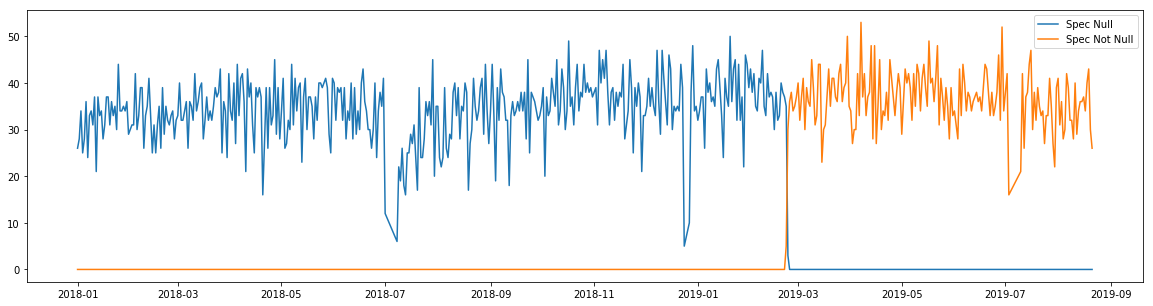

In [17]:
cure['date'] = cure['Cout_Date'].dt.date
cure['spec_not_null'] = cure['Spec'].notnull()
cure['spec_null'] = cure['Spec'].isnull()
plt.subplots(figsize=(20, 5))
plt.plot(cure.groupby('date')['spec_null'].sum())
plt.plot(cure.groupby('date')['spec_not_null'].sum())
plt.legend(('Spec Null','Spec Not Null'))
plt.show;

No matching specs for serials prior to ~2/2019?

In [18]:
cure

,Serial,C_Heater,C_HeaterPsn,Cin_Date,Cout_Date,Spec,spec,product_code,size,date,spec_not_null,spec_null
0,A8A000285,166PH4B22,3.0,2018-05-23 12:11:21.470,2018-05-23 18:35:04.333,NaN,NaN,NaN,NaN,2018-05-23,False,True
1,A8A000286,166PH4B22,1.0,2018-05-23 22:43:50.147,2018-05-24 05:05:31.533,NaN,NaN,NaN,NaN,2018-05-24,False,True
2,A8A000287,166PH4B22,2.0,2018-05-23 22:43:50.147,2018-05-24 05:05:31.533,NaN,NaN,NaN,NaN,2018-05-24,False,True
3,A8A000288,166PH4B22,3.0,2018-05-23 22:43:50.147,2018-05-24 05:05:31.533,NaN,NaN,NaN,NaN,2018-05-24,False,True
4,A8A000289,166PH4B22,4.0,2018-05-24 06:00:32.753,2018-05-24 12:22:13.940,NaN,NaN,NaN,NaN,2018-05-24,False,True
5,A8A000290,166PH4B22,4.0,2018-05-24 15:25:23.757,2018-05-24 22:04:07.940,NaN,NaN,NaN,NaN,2018-05-24,False,True
6,A8A000291,166PH4B22,1.0,2018-05-24 06:00:32.753,2018-05-24 12:22:13.940,NaN,NaN,NaN,NaN,2018-05-24,False,True
7,A8A000292,166PH4B22,2.0,2018-05-24 06:00:32.753,2018-05-24 12:22:13.940,NaN,NaN,NaN,NaN,2018-05-24,False,True
8,A8A000293,166PH4B22,3.0,2018-05-24 06:00:32.753,2018-05-24 12:22:13.940,NaN,NaN,NaN,NaN,2018-05-24,False,True
9,A8A000294,166PH4B22,1.0,2018-05-24 15:25:23.757,2018-05-24 22:04:07.940,NaN,NaN,NaN,NaN,2018-05-24,False,True


In [19]:
# manual checks
serial_spec[serial_spec['Serial'].str.contains('A9YSG0164')]

,Serial,Spec
4205,A9YSG0164,335092-05


In [20]:
# serial-spec
sql_query =\
'''
(select Serial,
        Spec
from PICS_Serial_Control
where Serial like '%A8AQH0203%')
'''
pd.read_sql_query(sql_query, connection)

,Serial,Spec


In [21]:
# check size freq
cure['size'].value_counts()

27.00R49         2271
46/90R57         2226
53/80R63          991
33.00R51          465
59/80R63          433
Name: size, dtype: int64

All the sizes?<br>
42/90R57 will exist prior to ~2017

In [22]:
# parse size in inches
cure['size_in'] = cure['size'].str[6:]

In [23]:
# summarize by date
cure['cure_date'] = cure['Cout_Date'].dt.date
cure_counts = cure.groupby(by = ['size_in','cure_date'], as_index = False)['Serial'].count()

In [24]:
cure_counts.rename(columns = {'Serial':'cure_count'}, inplace = True)

In [25]:
# date values
dates = pd.DataFrame(cure_counts['cure_date'].unique(), columns = ['cure_date'])
dates['key'] = 1

# size values
sizes = pd.DataFrame(cure_counts['size_in'].unique(), columns = ['size_in'])
sizes['key'] = 1

# cartesian
dates_sizes = pd.merge(dates, sizes, on = 'key', how = 'outer')

# drop key
dates_sizes.drop(columns = 'key', inplace = True)

In [26]:
print(cure_counts['cure_date'].min())
print(cure_counts['cure_date'].max())

2019-02-22
2019-08-21


In [27]:
# merge
cure_counts = pd.merge(dates_sizes, cure_counts, how = 'left', on = ['cure_date', 'size_in'])

In [28]:
# replace gaps with 0
cure_counts.replace(to_replace = np.nan, value = 0, inplace = True)

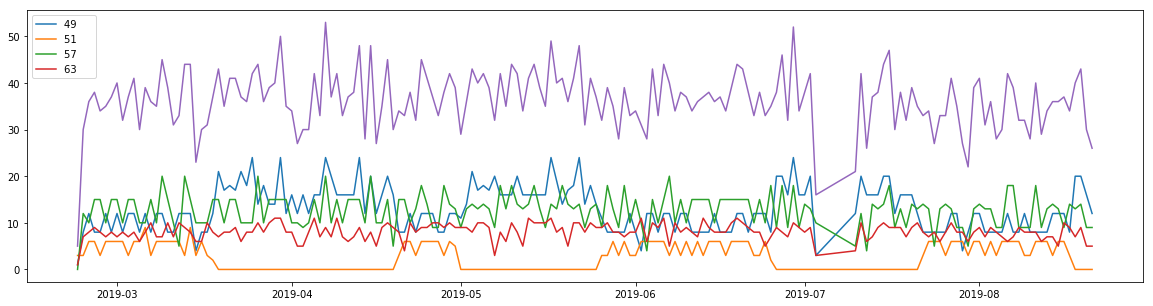

In [29]:
plt.subplots(figsize=(20, 5))
for size in cure_counts['size_in'].unique():
    # subset size within loop
    size_subset = cure_counts[cure_counts['size_in'] == size]
    # plot series
    plt.plot('cure_date', 'cure_count', data = size_subset)

# plot totals
cure_totals = cure_counts.groupby('cure_date', as_index = False)['cure_count'].sum()
plt.plot('cure_date', 'cure_count', data = cure_totals)
plt.legend(cure_counts['size_in'].unique())
plt.show()

Events that should be excluded? Production less than X?

First and last 3 days of 51 on/off stretch?<br>
AB/GA - last 3 days before 51 on, 1st day on, last day on, and first day off